# Project - my version

In [22]:
import sys

my_path = r'/home/ilaria/Scrivania/Machine_Learning/Project_1/Project1_ML'
sys.path.insert(0,my_path + r'/code/COMMON')

import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import load_csv_data 
from implementations import least_squares
from outliers import handle_outliers
from labels import idx_2labels
from standard import standardize

In [15]:
yb, input_data, ids = load_csv_data(my_path + r'/data/train.csv', sub_sample=False)

In [16]:
input_data.shape

(250000, 30)

In [23]:
input_data, yb = handle_outliers(input_data,yb,-999,0) # subsstitution with 0
ind_back, ind_sig = idx_2labels(yb, [-1,1])

input_data, mean_X, std_X = standardize(input_data)    

##  R^2 adjusted - choosing the features

In [24]:
# Subdived the X features space in single features
all_features = np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]

features = []
for i in range(len(all_features)):
    features.append((i,all_features[i]))
    


In [25]:
# STEP-WISE
all_candidates = input_data

n = all_candidates.shape[0] #needed for the R^2 adjusted
num = all_candidates.shape[1]
H = np.ones((n,1)) #offset

#Initialization only with offsets (lack of info)
X = H
K = 0 #needed for the R^2 adjusted
w0 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yb)

y = X.dot(w0) # our model output
e = yb - y
sse = np.sum(e**2)
sst = np.sum((yb - yb.mean())**2)
R2 = np.abs((sst-sse)/sst)
R2adj_0 = R2 - (K/(n-K-1)*(1-R2))

#fix the R2adj_max

R2adj_max = R2adj_0
ind_max = 0  # this index will show us which is the best feature chosen
del(X)
idx_features = []
best_R2adj = []

for j in range(num):
    R2_adj = []
    for i in range(all_candidates.shape[1]):
        
        X = np.concatenate((H,all_candidates[:,i].reshape(n,1)), axis=1)
        ws = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yb)
        k = len(ws) -1 # k is the number of regressor I use -> -1 because I don't consider the offset
        
        y = X.dot(ws)
        e = yb - y
        SSE = np.sum(e**2)
        SST = np.sum((yb- yb.mean())**2)
        R2 = np.abs((SST-SSE)/SST)
        R2_adj.append(R2 - (k/(n-k-1)*(1-R2)))
        
    R2adj_chosen = np.max(R2_adj)
    best_R2adj.append(R2adj_chosen)
    idx_chosen = np.argmax(R2_adj)
    
    if R2adj_chosen > R2adj_max:
        R2adj_max = R2adj_chosen
        ind_max = idx_chosen
        
        #idx_features.append(np.where(all_candidates[:,ind_max] == input_data))
        H = np.concatenate((H, all_candidates[:,ind_max].reshape(n,1)), axis = 1)
        
        all_candidates = np.delete(all_candidates,ind_max,1)
        print('-------------------------------------------------')
        print('Feature chosen: ', features[ind_max][1])
        idx_features.append(features[ind_max][0])
        del(features[ind_max])
        
        del(X)
        
    else:
        break
        


-------------------------------------------------
Feature chosen:  DER_mass_transverse_met_lep
-------------------------------------------------
Feature chosen:  PRI_tau_pt
-------------------------------------------------
Feature chosen:  DER_prodeta_jet_jet
-------------------------------------------------
Feature chosen:  DER_met_phi_centrality
-------------------------------------------------
Feature chosen:  DER_deltar_tau_lep
-------------------------------------------------
Feature chosen:  DER_mass_vis
-------------------------------------------------
Feature chosen:  PRI_lep_pt
-------------------------------------------------
Feature chosen:  DER_pt_ratio_lep_tau
-------------------------------------------------
Feature chosen:  DER_lep_eta_centrality
-------------------------------------------------
Feature chosen:  PRI_met_sumet
-------------------------------------------------
Feature chosen:  PRI_met
-------------------------------------------------
Feature chosen:  DER_m

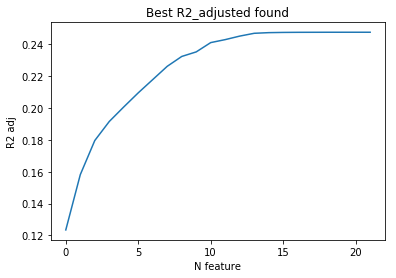

In [26]:
plt.plot(np.arange(len(best_R2adj)), best_R2adj)
plt.title("Best R2_adjusted found")
plt.xlabel("N feature")
plt.ylabel("R2 adj")
plt.show()

In [27]:
idx_features

[1, 13, 6, 11, 7, 2, 16, 10, 12, 21, 19, 5, 9, 23, 0, 26, 3, 22, 4, 18, 28]

In [28]:
# Reading file: data set for testing 
#yb_te, data_test, ids_test = load_csv_data(my_path + r'/data/test.csv', sub_sample=False)

In [29]:
tx = input_data[:,idx_features]

In [30]:
w_ls, losses_ls = least_squares(yb,tx)

In [31]:
losses_ls

0.34251552181183326

In [32]:
y_mymodel = tx.dot(w_ls)

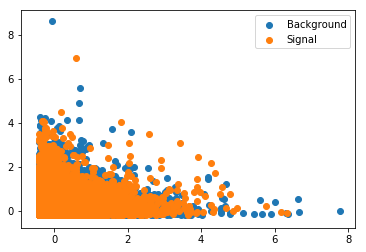

In [33]:
plt.scatter(input_data[ind_back,1], input_data[ind_back,13])
plt.scatter(input_data[ind_sig,1], input_data[ind_sig,13])
plt.legend(['Background','Signal'])
plt.show()

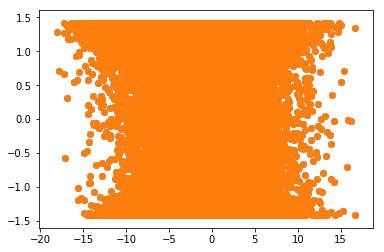

In [21]:
plt.scatter(input_data[:,6], input_data[:,11])
plt.show()